In [3]:
import argparse as ap
import cv2
import numpy as np
import os
from sklearn.externals import joblib
from scipy.cluster.vq import *
 
from sklearn import preprocessing
import numpy as np
 
from pylab import *
from PIL import Image

In [6]:
class Struct():
    def __init__(self):
        pass
args = Struct()
args.query_path='/share/dong/Data/OxfordBuilding/gtfiles/'
args.image_path='/share/dong/Data/OxfordBuilding/images/'
def get_roi(query_path):
    roi_dict = {}
    filelist = os.listdir(query_path)
    for item in filelist:
        if item.endswith('_query.txt'):
            path = query_path + item
            with open(path,'r') as query_file:
                line = query_file.read().strip().split(' ')
                img_name = line[0]
                ROI = [int(float(t)) for t in line[1:]]
                roi_dict[item[:-10]]=(img_name,ROI)
    return roi_dict
roi_dict = get_roi(args.query_path)

oxc1_oxford_003410


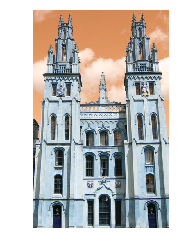

In [10]:
def get_roi_img(path,name,roi):
    img_path = path + name[5:] +'.jpg'
    img=cv2.imread(img_path)
    color = (0,255,0)
    pt1,pt2 = tuple(roi[:2]),tuple(roi[2:])
    return img[pt1[1]:pt2[1],pt1[0]:pt2[0]]
name,roi=roi_dict['all_souls_5']
print(name)
img = get_roi_img(args.image_path, name, roi)
plt.axis('off')
plt.imshow(img)

oxc1_oxford_003410
/share/dong/Data/OxfordBuilding/images/oxford_000478.jpg
/share/dong/Data/OxfordBuilding/images/oxford_003410.jpg
/share/dong/Data/OxfordBuilding/images/all_souls_000064.jpg
/share/dong/Data/OxfordBuilding/images/oxford_000174.jpg
/share/dong/Data/OxfordBuilding/images/oxford_000769.jpg
/share/dong/Data/OxfordBuilding/images/all_souls_000002.jpg
/share/dong/Data/OxfordBuilding/images/trinity_000283.jpg
/share/dong/Data/OxfordBuilding/images/oxford_000809.jpg
/share/dong/Data/OxfordBuilding/images/christ_church_000366.jpg
/share/dong/Data/OxfordBuilding/images/jesus_000320.jpg
/share/dong/Data/OxfordBuilding/images/balliol_000085.jpg
/share/dong/Data/OxfordBuilding/images/oxford_003056.jpg
/share/dong/Data/OxfordBuilding/images/all_souls_000119.jpg
/share/dong/Data/OxfordBuilding/images/magdalen_000446.jpg
/share/dong/Data/OxfordBuilding/images/oxford_003480.jpg
/share/dong/Data/OxfordBuilding/images/new_000798.jpg
oxford_000478

oxford_003410

all_souls_000064

oxfor

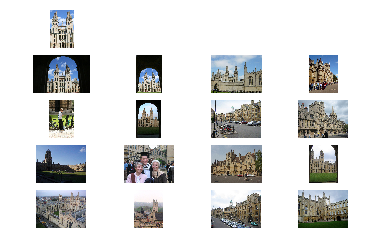

In [15]:
def get_roi_img(path,name,roi):
    img_path = path + name[5:] +'.jpg'
    img=cv2.imread(img_path)
    color = (0,255,0)
    pt1,pt2 = tuple(roi[:2]),tuple(roi[2:])
    return img[pt1[1]:pt2[1],pt1[0]:pt2[0]]
name,roi=roi_dict['all_souls_5']
print(name)
img = get_roi_img(args.image_path, name, roi)

# Load the classifier, class names, scaler, number of clusters and vocabulary
im_features, image_paths, idf, numWords, voc = joblib.load("bof.pkl")

# Create feature extraction and keypoint detector objects
sift = cv2.xfeatures2d.SIFT_create()

# List where all the descriptors are stored
des_list = []

im = img
kpts = sift.detect(im)
kpts, des = sift.compute(im, kpts)
 
des_list.append((name, des))
 
# Stack all the descriptors vertically in a numpy array
descriptors = des_list[0][1]
 
#
test_features = np.zeros((1, numWords), "float32")
words, distance = vq(descriptors,voc)
for w in words:
    test_features[0][w] += 1

#Perform Tf-Idf vectorization and L2 normalization
test_features = test_features*idf
test_features = preprocessing.normalize(test_features, norm='l2')
 
score = np.dot(test_features, im_features.T)
rank_ID = np.argsort(-score)
 
# Visualize the results
figure()
gray()
subplot(5,4,1)
imshow(im[:,:,::-1])
axis('off')
for i, ID in enumerate(rank_ID[0][0:16]):
    print(image_paths[ID])
    img = Image.open(image_paths[ID])
    gray()
    subplot(5,4,i+5)
    imshow(img)
    axis('off')
with open("ranklist.txt",'w') as output:
    for ID in rank_ID[0][0:16]:
        img_name=image_paths[ID].split('/')
        img_name=img_name[-1].replace(".jpg",'\n')
        print(img_name)
        output.write(img_name)
show()